In [1]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import scvelo as scv
import os
import time

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = scv.datasets.pancreas(file_path=r"C:\Users\evanlee\Documents\Research_datasets\Pancreas\endocrinogenesis_day15.h5ad")
label = data.obs['clusters'].tolist()
data.shape

(3696, 27998)

In [3]:
X_sparse = data.X
type(X_sparse)

scipy.sparse._csr.csr_matrix

## UMAP

In [9]:
fit = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
u = fit.fit_transform(X_sparse)

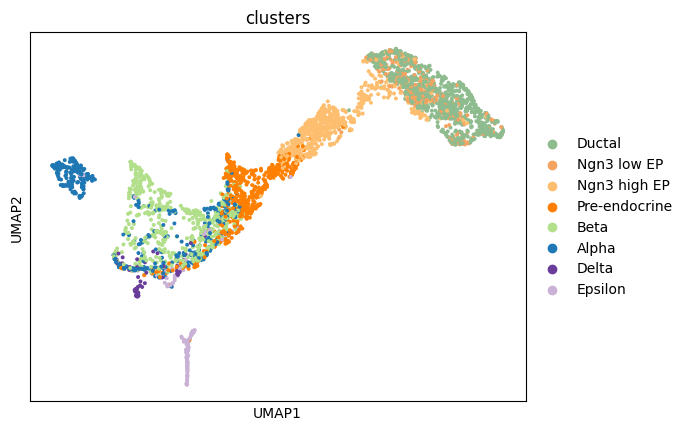

In [12]:
data.obsm['X_umap'] = u
sc.pl.umap(data, color='clusters')

## UMAP Jaccard

In [16]:
X_binary = (data.X > 0).astype(int)
type(X_binary)

scipy.sparse._csr.csr_matrix

In [22]:
fit_j = umap.UMAP(n_neighbors=15, n_components=2, metric='jaccard')
u_j = fit_j.fit_transform(X_binary)

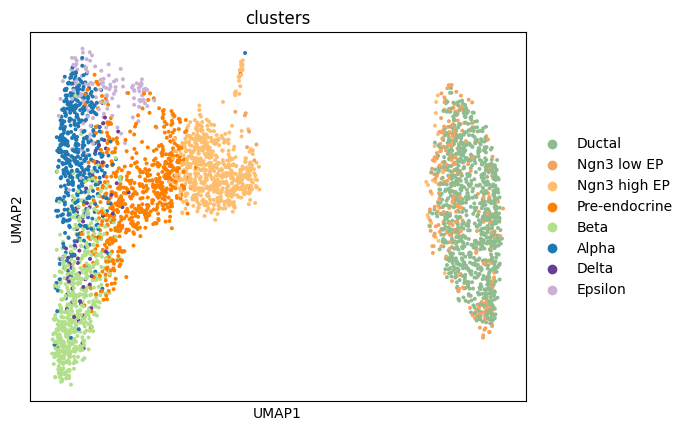

In [25]:
data.obsm['X_umap'] = u_j
sc.pl.umap(data, color='clusters')

## UMAP Jaccard 2

In [28]:
fit_j2 = umap.UMAP(n_neighbors=15, n_components=2, metric='jaccard')
u_j2 = fit_j2.fit_transform(X_sparse)

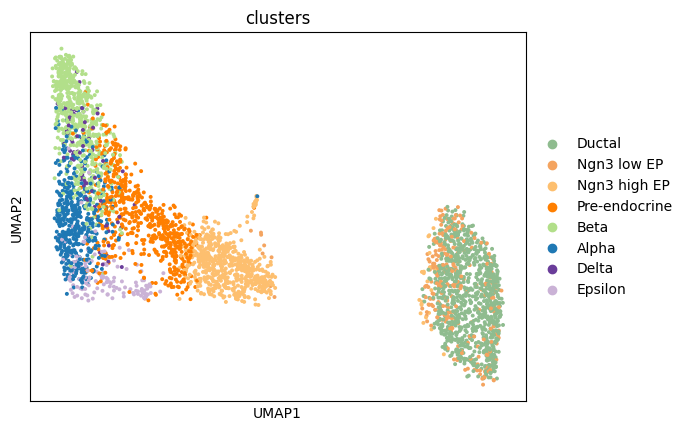

In [29]:
data.obsm['X_umap'] = u_j2
sc.pl.umap(data, color='clusters')